In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [19]:
X_train 

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [21]:
X_train.shape

(60000, 28, 28)

In [ ]:
# so basically this is an 3d array
# 60000,28,28
# so it  has 60000 images, each of size 28x28 pixels

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
# y train this basically has the digits actually present in the images
# so it has 60000 labels, each label is a digit from 0 to 9

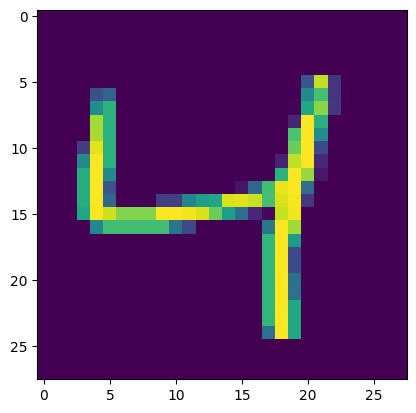

In [24]:
# we can visualize the images using matplotlib
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [25]:
# now we need to preprocess the data
# we need to normalize the data, so that the pixel values are between 0 and 1
# we can do this by dividing the pixel values by 255
# because currently the pixel values are between 0 and 255
# so we can divide the pixel values by 255 to get the pixel values between 0 and 1 
# this will help the model to learn better

X_train = X_train/255 # so dividing by maximum value because pixel values are between 0 and 255 so we can normalize the data we can get the pixel values between 0 and 1
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [26]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) 
# do flattening si currently its in 28x28 shape
# so we need to convert it to 1d array of size 784
# so we can use Flatten layer to convert the 2d array to 1d array
# so now the input shape is (28,28) and the output shape is (784,)

model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

d:\SAURABH\spring 2024\DeepLearningProjects\customer_churn_prediction_using_ANN\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8418 - loss: 0.5390 - val_accuracy: 0.9545 - val_loss: 0.1569
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9614 - loss: 0.1297 - val_accuracy: 0.9663 - val_loss: 0.1132
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9742 - loss: 0.0824 - val_accuracy: 0.9722 - val_loss: 0.0981
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9818 - loss: 0.0580 - val_accuracy: 0.9719 - val_loss: 0.0959
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9849 - loss: 0.0473 - val_accuracy: 0.9711 - val_loss: 0.1019
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accuracy: 0.9734 - val_loss: 0.1009
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9692 - val_loss: 0.1236
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9919 - loss: 0.0248 - 

In [12]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
y_prob

array([[1.3286063e-14, 3.1388699e-13, 8.4449607e-11, ..., 9.9999988e-01,
        1.4548264e-13, 3.6851469e-10],
       [1.4925853e-21, 3.0627553e-10, 1.0000000e+00, ..., 4.4165271e-26,
        8.1873956e-16, 2.9981204e-28],
       [3.0082034e-10, 9.9999905e-01, 1.6485316e-07, ..., 6.1440367e-08,
        6.4472920e-07, 2.6335189e-13],
       ...,
       [2.4806938e-24, 1.2147664e-26, 2.5947049e-29, ..., 6.3145975e-17,
        1.0725917e-19, 1.1445482e-11],
       [2.3520720e-31, 3.5503319e-36, 1.2344091e-34, ..., 5.4357338e-35,
        6.2473217e-16, 1.0403372e-27],
       [2.3753963e-14, 8.4913404e-28, 2.9830603e-21, ..., 8.1365292e-29,
        4.8263555e-25, 6.8318005e-24]], dtype=float32)

In [28]:
# so y prob is basically the probabilities of each digit for each image
# so it has 10000 images, each image has 10 probabilities for each digit from 0 to 9
# so we can use argmax to get the index of the maximum probability for each image

In [30]:
# so if we see y_prob the values are probabilities for 9 digits
# now we need to get the index of the maximum probability for each image
# so we can use argmax to get the index of the maximum probability for each image

y_pred = y_prob.argmax(axis=1)

In [29]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9756

In [ ]:
# accuracy is great
# when we applied ML algorithms on MNIST dataset we got around 95% accuracy even after tuning the hyperparameters
# but here we are getting around 98% accuracy with just a few layers and epochs  
# even when will use cnn that will give us even better accuracy

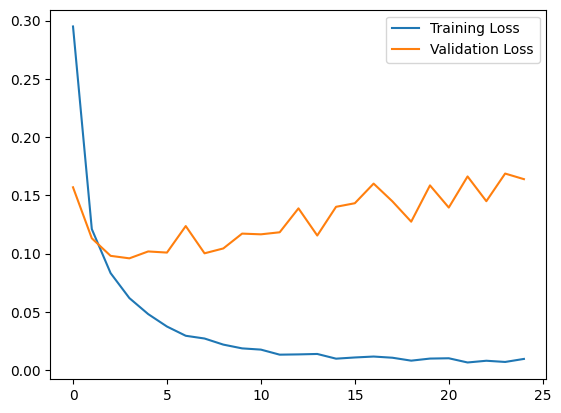

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss', 'Validation Loss'])

In [36]:
# The plot below shows two lines: "Training Loss" and "Validation Loss" over each training epoch.
# "Training Loss" measures how well the model is learning from the data it has already seen.
# "Validation Loss" measures how well the model performs on new, unseen data.

# If both losses decrease and stay close together, the model is learning well and generalizing.
# If the training loss keeps decreasing but the validation loss starts increasing or stays much higher,
# it means the model is starting to "memorize" the training data instead of learning general patterns.
# This is called "overfitting".

# The model does very well on the data it has seen (low training loss) but poorly on new data (high validation loss).



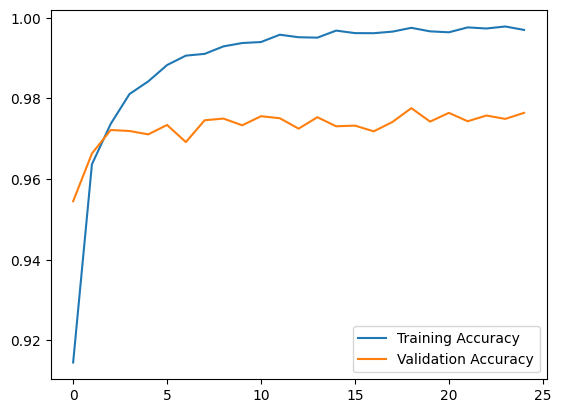

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])

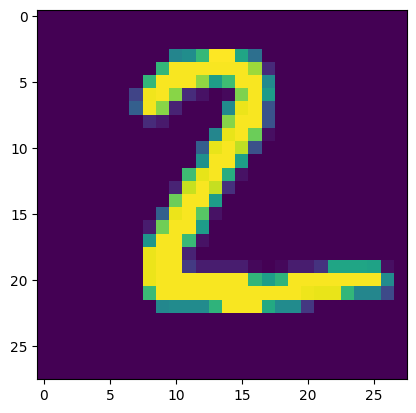

In [17]:
plt.imshow(X_test[1])

In [18]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([2])